<a href="https://colab.research.google.com/github/Chiebukar/AGER/blob/main/sample_projects/machine_learning/classification/classify_iris_flowers_with_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['target_names'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
new = df.groupby(['target_names', 'target']).mean()

In [ ]:
new

,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target_names,target,,,,
setosa,0,5.006,3.428,1.462,0.246
versicolor,1,5.936,2.770,4.260,1.326
virginica,2,6.588,2.974,5.552,2.026


In [ ]:
(new / new.sum()) * 100

,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target_names,target,,,,
setosa,0,28.556760,37.374618,12.967891,6.837132
versicolor,1,33.861951,30.200611,37.786056,36.853808
virginica,2,37.581289,32.424771,49.246053,56.309061


In [ ]:
seto = df[df['target']==0]
vers = df[df['target']==1]
virg = df[df['target']==2]

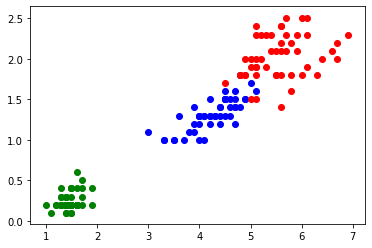

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(seto['petal length (cm)'], seto['petal width (cm)'], color = 'green')
plt.scatter(vers['petal length (cm)'], vers['petal width (cm)'], color = 'blue')
plt.scatter(virg['petal length (cm)'], virg['petal width (cm)'], color = 'red')

In [ ]:
x = df.drop(['target', 'target_names'], axis = 'columns')
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.score(x_test, y_test)

1.0